In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# Import API key
from api_keys import Nasdaq_API_Key

In [70]:
print(Nasdaq_API_Key)

6yrAhLjypakkcKx-oE3z


In [63]:
# Defined the file paths and read the CSV files into pandas DataFrames

interest_rates = pd.read_csv("Resources/interest_rates.csv")
median_sales_df = pd.read_csv("Resources/median_sale.csv")
home_value_df = pd.read_csv("Resources/Index_home_value.csv")


In [64]:
# Filter the DataFrame for "New York, NY" and "Houston, TX" and filtering by 2018-08-31 to keep data consistent

cities_home_value = home_value_df.loc[home_value_df["RegionName"].isin(["New York, NY", "Dallas, TX", "Houston, TX", "San Antonio, TX", "Austin, TX"])]

start_date_idx = cities_home_value.columns.get_loc("2018-08-31")
cities_home_value = cities_home_value[["RegionName"]].join(cities_home_value.iloc[:, start_date_idx:])
cities_home_value.head(6)

,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
1,"New York, NY",453849.307119,456122.796489,457268.810494,457976.465341,458217.380897,459451.748116,461677.610218,464645.038983,467649.584127,...,602170.466581,599983.291543,598149.105775,595670.337879,595634.633542,596861.419227,600803.824170,603913.504378,608086.786180,613275.820652
4,"Dallas, TX",255322.815687,256089.695781,256535.862904,257036.993977,257762.027392,258739.186736,259829.599660,260818.283865,261442.935509,...,387026.606158,384909.011181,382969.899480,380395.338227,377771.122410,375643.708827,374907.532802,374561.842990,374973.053827,376025.512105
5,"Houston, TX",211560.039916,212375.359624,213058.095793,213829.440461,214664.982353,215538.610253,216439.739364,217310.479938,217971.320446,...,310543.829611,309925.013050,309250.006189,307868.072433,306261.052962,305056.465513,305030.605416,305236.900048,305697.922596,306423.147669
24,"San Antonio, TX",197329.901644,198023.934060,198605.359735,199300.847555,200185.208222,201021.649405,201656.715049,202107.612074,202510.367445,...,298904.186626,297874.308519,296999.698860,295617.780931,294440.507469,293720.092721,294212.292461,294428.372152,294643.599548,294966.629536
29,"Austin, TX",317100.104920,317954.465997,318729.871176,319725.868845,320874.524546,321695.702377,322352.319540,322892.204661,323484.006758,...,532553.695831,524750.782214,517129.741131,509081.747574,501930.280190,496333.958825,493055.851107,490415.085230,488545.673121,487536.622715


In [65]:

def plot_cities_data(data_df, city1_name, city2_name, city3_name, city4_name, city5_name, y_label, title):
    plt.figure(figsize=(12, 12))  

    # First subplot: Median Sales Data
    plt.subplot(2, 1, 1)
    # Plots the data for each city as a line graph
    plt.plot(data_df.columns[6:], data_df[data_df["RegionName"] == city1_name].iloc[0, 6:].values, label=city1_name)
    plt.plot(data_df.columns[6:], data_df[data_df["RegionName"] == city2_name].iloc[0, 6:].values, label=city2_name)
    plt.plot(data_df.columns[6:], data_df[data_df["RegionName"] == city3_name].iloc[0, 6:].values, label=city3_name)
    plt.plot(data_df.columns[6:], data_df[data_df["RegionName"] == city4_name].iloc[0, 6:].values, label=city4_name)
    plt.plot(data_df.columns[6:], data_df[data_df["RegionName"] == city5_name].iloc[0, 6:].values, label=city5_name)

    # Adds labels and titles
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Rotates the x-axis tick labels diagonally
    plt.xticks(rotation=45, ha="right", fontsize=8)

    # Second subplot: Relative Strength Index (RSI) Data
    plt.subplot(2, 1, 2)
    # Calculates RSI for each city's median sales data
    rsi_period = 14  # Defines the period for RSI calculation
    for city in [city1_name, city2_name, city3_name, city4_name, city5_name]:
        city_data = data_df[data_df["RegionName"] == city].iloc[0, 6:]
        delta = city_data.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=rsi_period).mean()
        avg_loss = loss.rolling(window=rsi_period).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))

        # Plots RSI values on the graph
        plt.plot(data_df.columns[6:], rsi, label=f"{city} RSI")
        plt.xticks(rotation=45, ha="right", fontsize=8)
        # Marks overbought (RSI > 70) and oversold (RSI < 30) regions with horizontal lines
        plt.axhline(70, color='r', linestyle='--', alpha=0.5)
        plt.axhline(30, color='g', linestyle='--', alpha=0.5)

    # Adds labels and titles for the second subplot
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.title("Relative Strength Index (RSI)")
    plt.legend()

    plt.tight_layout()  
    plt.show()



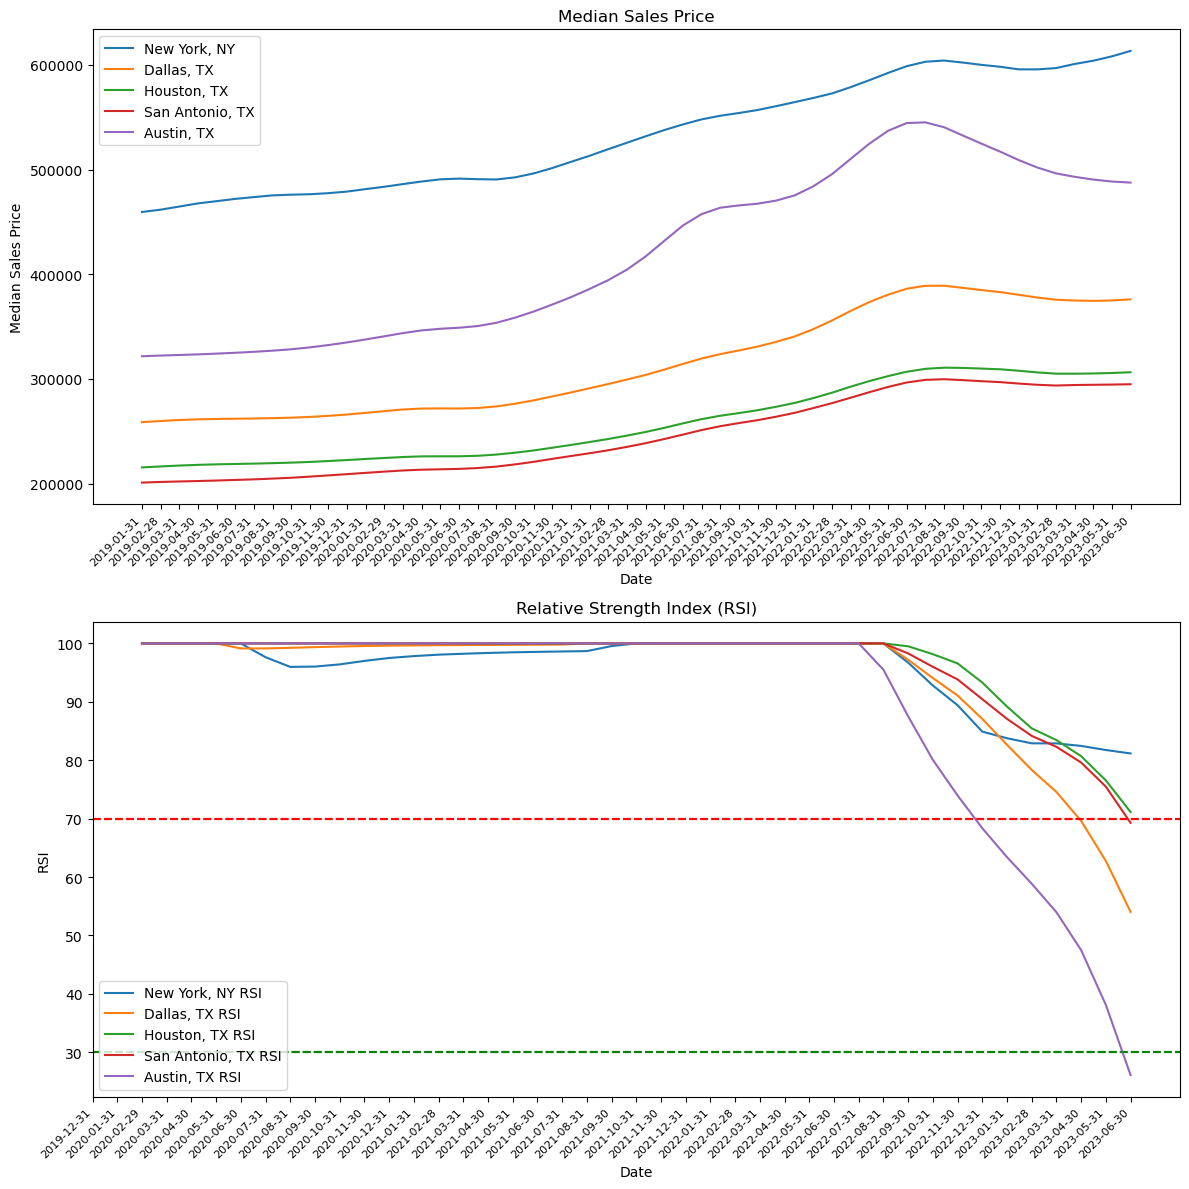

In [66]:
plot_cities_data(cities_home_value,"New York, NY", "Dallas, TX", "Houston, TX", "San Antonio, TX", "Austin, TX", "Median Sales Price", "Median Sales Price")


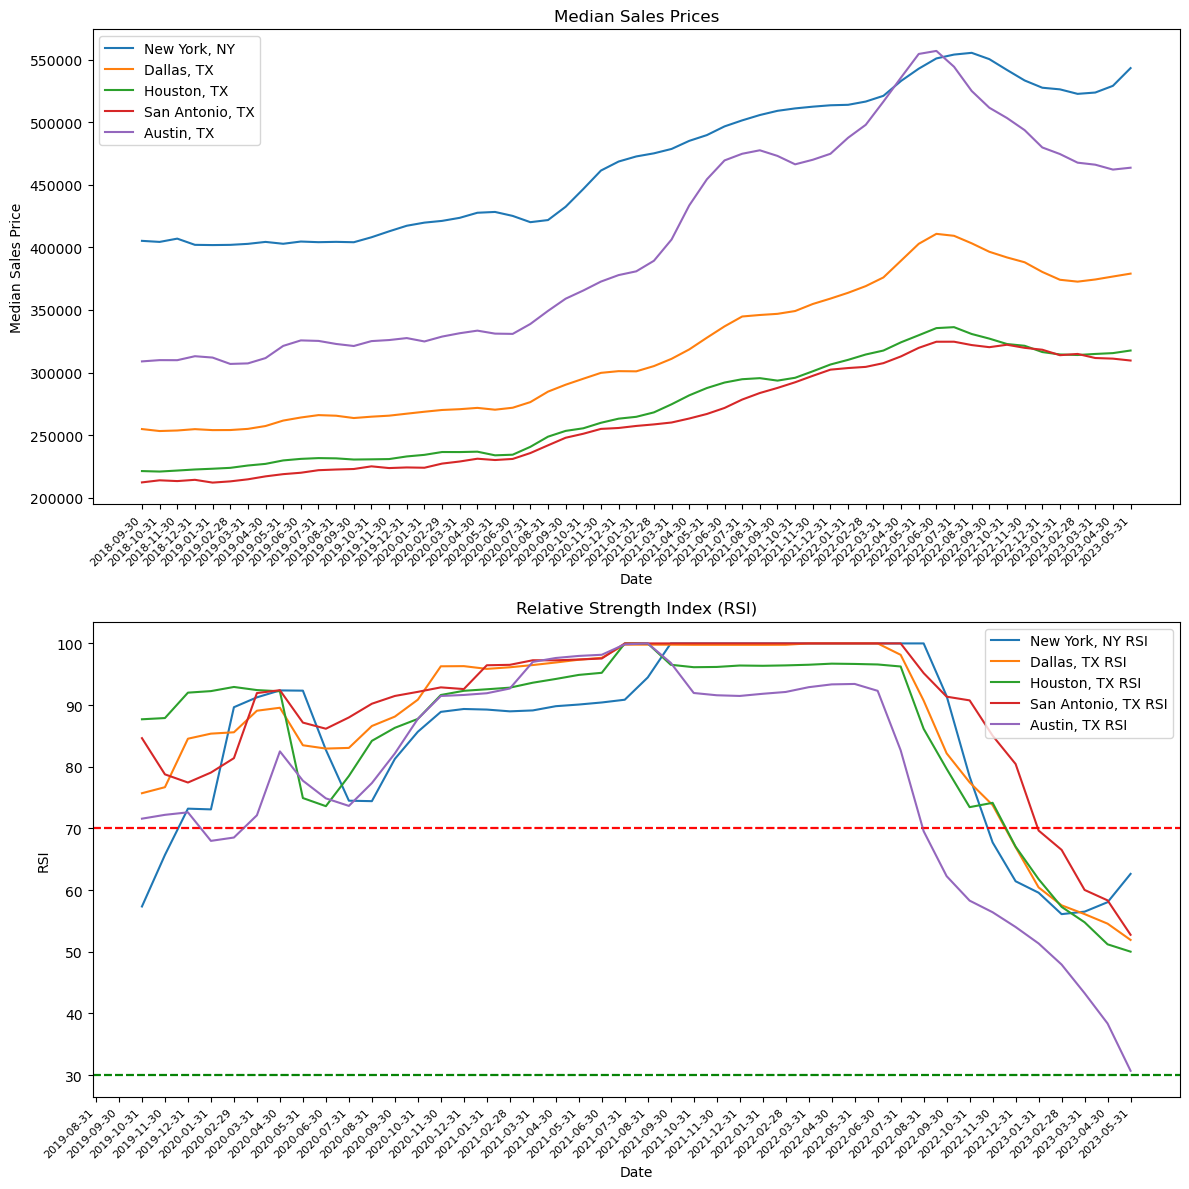

In [67]:
plot_cities_data(median_sales_df, "New York, NY", "Dallas, TX", "Houston, TX", "San Antonio, TX", "Austin, TX", y_label="Median Sales Price", title="Median Sales Prices")


In [68]:
interest_rates.head()

,DATE,REAINTRATREARAT10Y
0,8/1/2018,1.255242
1,9/1/2018,1.132147
2,10/1/2018,1.300127
3,11/1/2018,1.308658
4,12/1/2018,1.254967
